# 6.4. Supervised Machine Learning: Regression

## This script contains:
### 1. Importing libraries and data
### 2. Data Cleaning
### 3. Data prep for regression analysis & Regression Analysis

# 1. Importing Libraries & Data

## Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data

In [2]:
# create path
path = r'C:\Users\M de Villiers\Desktop\Data Analytics\Achievement 6\02_Data\Prepared_Data'

In [3]:
# Import data
df= pd.read_csv(os.path.join(path, 'FINAL_COVID_19_DATA.csv'), index_col = False)

In [4]:
df.head()

,country,iso_code,month_year,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,monthly_vaccinations_raw,monthly_vaccinations,total_vaccinations_per_hundred,...,people_fully_vaccinated_per_hundred,monthly_vaccinations_per_million,continent,population,new_cases,total_cases,new_deaths,total_deaths,%deaths,%cases
0,Afghanistan,AFG,2021-02,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",8200.0,8200.0,0.0,0.0,8202.0,0.02,...,0.00,204.0,Asia,39835428.0,691.0,55714.0,43.0,2443.0,0.006133,0.139860
1,Afghanistan,AFG,2021-03,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",54000.0,54000.0,0.0,0.0,85894.0,0.14,...,0.00,2154.0,Asia,39835428.0,740.0,56454.0,41.0,2484.0,0.006236,0.141718
2,Afghanistan,AFG,2021-04,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",240000.0,240000.0,0.0,0.0,219606.0,0.60,...,0.00,5511.0,Asia,39835428.0,3291.0,59745.0,141.0,2625.0,0.006590,0.149980
3,Afghanistan,AFG,2021-05,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",600152.0,480226.0,119926.0,2859.0,285838.0,1.51,...,0.30,7171.0,Asia,39835428.0,12093.0,71838.0,319.0,2944.0,0.007390,0.180337
4,Afghanistan,AFG,2021-06,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",886854.0,699200.0,187654.0,4015.0,242899.0,2.23,...,0.47,6097.0,Asia,39835428.0,46821.0,118659.0,1927.0,4871.0,0.012228,0.297873


In [5]:
df.tail()

,country,iso_code,month_year,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,monthly_vaccinations_raw,monthly_vaccinations,total_vaccinations_per_hundred,...,people_fully_vaccinated_per_hundred,monthly_vaccinations_per_million,continent,population,new_cases,total_cases,new_deaths,total_deaths,%deaths,%cases
5463,Zimbabwe,ZWE,2020-09,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Africa,15092171.0,1341.0,7838.0,26.0,228.0,0.001511,0.051934
5464,Zimbabwe,ZWE,2020-10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Africa,15092171.0,529.0,8367.0,15.0,243.0,0.001610,0.055439
5465,Zimbabwe,ZWE,2020-11,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Africa,15092171.0,1583.0,9950.0,33.0,276.0,0.001829,0.065928
5466,Zimbabwe,ZWE,2020-12,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Africa,15092171.0,3917.0,13867.0,87.0,363.0,0.002405,0.091882
5467,Zimbabwe,ZWE,2021-01,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Africa,15092171.0,19521.0,33388.0,854.0,1217.0,0.008064,0.221227


In [6]:
df.shape

(5468, 21)

# 2. Data Cleaining


### Changeing datatype and dropping columns for potential regression analysis
I wanted delete rows that would only have data on covid cases and deaths and not vaccinations. I think it would make sense to only analyse the years (2021 and 2022) that contains information about both, since covid started in 2019 and vaccinations only in December 2020.

In [7]:
df['month_year'].astype(str)

0       2021-02
1       2021-03
2       2021-04
3       2021-05
4       2021-06
         ...   
5463    2020-09
5464    2020-10
5465    2020-11
5466    2020-12
5467    2021-01
Name: month_year, Length: 5468, dtype: object

In [8]:
df1=df.drop(df[df['month_year'].isin(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11'])].index)

In [9]:
df1.shape #It seems this new dataset does not have enough rows to do the analysis

(3518, 21)

### Although this dataset is too small, I still tried the linear regression on it but I did not discuss the results since it was not much different from the results of the full dataset.

C:\Users\M de Villiers\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_cases', ylabel='Density'>

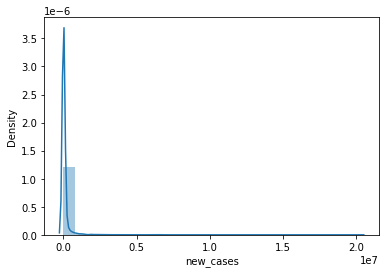

In [10]:
sns.distplot(df['new_cases'], bins=25) # Shows extreme values

# 3. Data Prep & Regression Analysis

### Total Vaccinations vs New Deaths

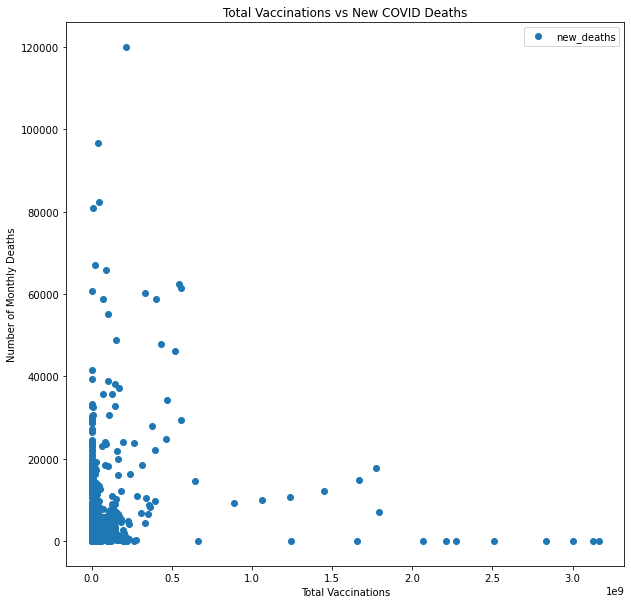

In [71]:
# Scatterplot
f,ax = plt.subplots(figsize=(10,10))
df.plot(x = 'total_vaccinations', y='new_deaths',style='o', ax=ax)
plt.title('Total Vaccinations vs New COVID Deaths')  
plt.xlabel('Total Vaccinations')  
plt.ylabel('Number of Monthly Deaths')  
plt.show()

## Hypothesis 1: The more vaccinations are administered, the less monthly deaths will be reported.

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['total_vaccinations'].values.reshape(-1,1)
y = df['new_deaths'].values.reshape(-1,1)

In [13]:
X

array([[  8200.],
       [ 54000.],
       [240000.],
       ...,
       [     0.],
       [     0.],
       [     0.]])

In [14]:
y

array([[ 43.],
       [ 41.],
       [141.],
       ...,
       [ 33.],
       [ 87.],
       [854.]])

In [15]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# Create a regression object.
regression = LinearRegression()

In [17]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

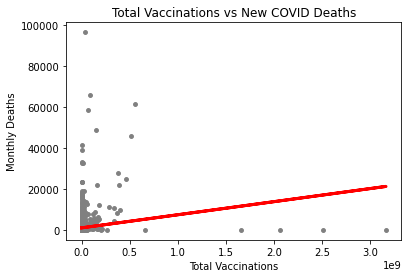

In [19]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Vaccinations vs New COVID Deaths')
plot_test.xlabel('Total Vaccinations')
plot_test.ylabel('Monthly Deaths')
plot_test.show()

## Question 10
The line does not seem to fit very well on the data set. The line moves in an upward direction that would suggest a positive correlation (as vaccinations increase so does the death rate) but the actual data points seem to be on a constant '0' value.

In [20]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.3996508e-06]]
Mean squared error:  25710784.563521482
R2 score:  0.01210260610995606


In [22]:
y_predicted

array([[1015.07804113],
       [1066.91025925],
       [1028.20187541],
       ...,
       [1015.07804113],
       [1015.07804113],
       [1015.31232594]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,662.0,1015.078041
1,178.0,1066.910259
2,4.0,1028.201875
3,0.0,1016.055338
4,88.0,1015.078041
5,0.0,1015.078041
6,489.0,1167.105010
7,0.0,1015.093400
8,25.0,1026.450765
9,1998.0,1015.078041


## Question 13:
This linear regression model did not do well on this set at all. I don't think it is only the regression model's fault though. There is likely not a strong correlation between the variables and even if there were, it is not linear. It might also have to do with the fact that each country has a vastly different population size and some countries will naturally have much more vaccinations than others, and much more deaths than others. There are also many other factors that would have an influence on the number of deaths (the severity of the COVID-strain, the capacity of hospitals and clinics, how developed the country is, etc). It would perhaps make more sense analysing each country separately, or at least each continent, or perhaps an aggragted sum globally, since this will perhaps reduce the variability of the variables. This also perhaps shows how truly unpredictable COVID-19 is still and how we still have so much more to learn of this disease. People we think will never die of COVID, dies, etc. I believe we still require much more data on COVID-19 before we can truly make accurate predictions.

In [24]:
#Compare how the regression fits the training set
y_predicted_train = regression.predict(X_train)

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.3996508e-06]]
Mean squared error:  23692241.594840396
R2 score:  0.025035511356992113


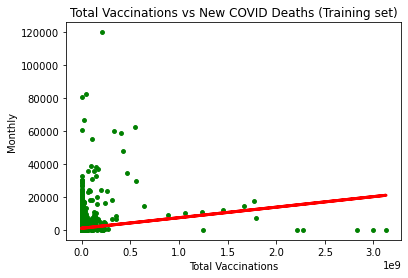

In [27]:
# Visualizing the training set results.
plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_train.title('Total Vaccinations vs New COVID Deaths (Training set)')
plot_train.xlabel('Total Vaccinations')
plot_train.ylabel('Monthly')
plot_train.show()

### Total Vaccinations & New cases

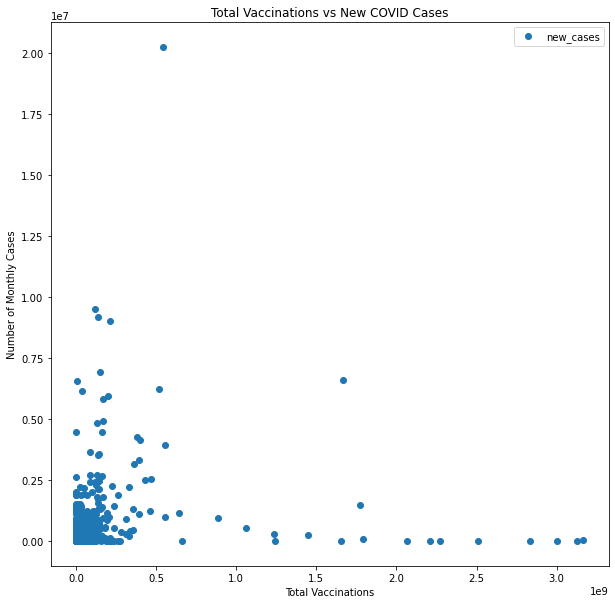

In [70]:
# Scatterplot1
f,ax = plt.subplots(figsize=(10,10))
df.plot(x = 'total_vaccinations', y='new_cases',style='o', ax=ax)
plt.title('Total Vaccinations vs New COVID Cases')  
plt.xlabel('Total Vaccinations')  
plt.ylabel('Number of Monthly Cases')  
plt.show()

## Hypothesis 2: The more vaccinations are administered, the less monthly cases will be reported.

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X1 = df['total_vaccinations'].values.reshape(-1,1)
y1 = df['new_cases'].values.reshape(-1,1)

In [30]:
# Split data into a training set and a test set.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [31]:
# Fit the regression object onto the training set.
regression.fit(X_train1, y_train1)

LinearRegression()

In [32]:
# Predict the values of y using X.
y_predicted1 = regression.predict(X_test1)

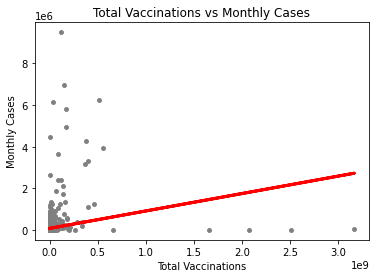

In [33]:
# Create a plot that shows the regression line from the model on the test set.
plot_test1 = plt
plot_test1.scatter(X_test1, y_test1, color='gray', s = 15)
plot_test1.plot(X_test1, y_predicted1, color='red', linewidth =3)
plot_test1.title('Total Vaccinations vs Monthly Cases')
plot_test1.xlabel('Total Vaccinations')
plot_test1.ylabel('Monthly Cases')
plot_test1.show()

## Question 10
The line does not seem to fit very well on the data set. The line move in an upward direction that would suggest a positive correlation (as vaccinations increase so does the number of cases) but the actual data points seem to be on a constant '0' value.

In [34]:
# Create objects that contain the model summary statistics.
rmse1 = mean_squared_error(y_test1, y_predicted1)
r2_1 = r2_score(y_test1, y_predicted1)

In [35]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[0.00083723]]
Mean squared error:  246522693473.89713
R2 score:  0.022226716285479453


In [36]:
y_predicted1

array([[74975.63380755],
       [81756.52381901],
       [76692.54425508],
       ...,
       [74975.63380755],
       [74975.63380755],
       [75006.28384774]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y.
data1 = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_predicted1.flatten()})
data1.head(30)

,Actual,Predicted
0,65907.0,74975.633808
1,21517.0,81756.523819
2,4178.0,76692.544255
3,1.0,75103.487567
4,13875.0,74975.633808
5,66.0,74975.633808
6,92167.0,94864.386199
7,0.0,74977.643152
8,44454.0,76463.457203
9,156782.0,74975.633808


## Question 13:
This answer is basically the same as for "Total vaccinations vs number of monthly deaths".
The linear regression model does not do well on this set at all. There is likely not a strong correlation between the variables and even if there were, it is not linear. It might also have to do with the fact that each country has a vastly different population size and some countries will naturally have much more vaccinations than others, and much more cases than others. It would perhaps make more sense analysing each country separately, or at least each continent, or perhaps an aggragted sum globally, since this will perhaps reduce the variability of the variables. This also perhaps shows how truly unpredictable COVID-19 is still and how we still have so much more to learn of this disease. People we think will never contract COVID (e.g. someone who has already had the 3 shots), tests positive, etc. I believe we still require much more data on COVID-19 before we can truly make accurate predictions.

In [38]:
#Compare how the regression fits the training set
y_predicted_train1 = regression.predict(X_train1)

In [39]:
rmse1 = mean_squared_error(y_train1, y_predicted_train1)
r2_1 = r2_score(y_train1, y_predicted_train1)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[0.00083723]]
Mean squared error:  247547067467.0889
R2 score:  0.040364194502664597


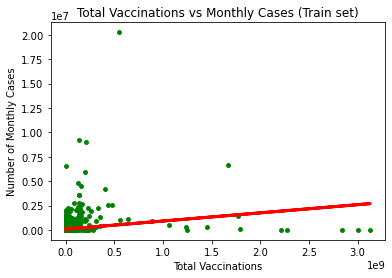

In [41]:
# Visualizing the training set results.
plot_train1 = plt
plot_train1.scatter(X_train1, y_train1, color='green', s = 15)
plot_train1.plot(X_train1, y_predicted_train1, color='red', linewidth =3)
plot_train1.title('Total Vaccinations vs Monthly Cases (Train set)')
plot_train1.xlabel('Total Vaccinations')
plot_train1.ylabel('Number of Monthly Cases')
plot_train1.show()

### Test the above regressions with df1 (without deaths and cases from 2019 and 2020)

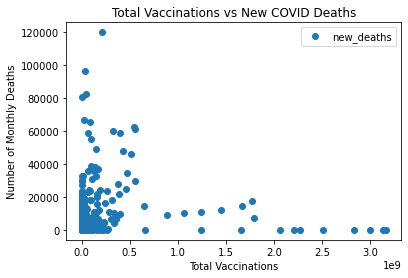

In [42]:
# Scatterplot (same hypothesis as Hypothesis 1)
df1.plot(x = 'total_vaccinations', y='new_deaths',style='o')
plt.title('Total Vaccinations vs New COVID Deaths')  
plt.xlabel('Total Vaccinations')  
plt.ylabel('Number of Monthly Deaths')  
plt.show()

In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X2 = df1['total_vaccinations'].values.reshape(-1,1)
y2 = df1['new_cases'].values.reshape(-1,1)

In [44]:
# Split data into a training set and a test set.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [45]:
# Fit the regression object onto the training set.
regression.fit(X_train2, y_train2)

LinearRegression()

In [46]:
# Predict the values of y using X.
y_predicted2 = regression.predict(X_test2)

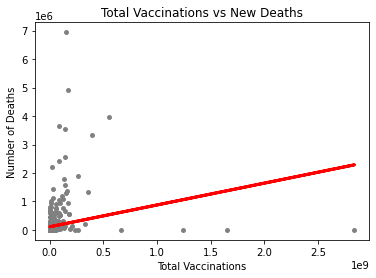

In [47]:
# Create a plot that shows the regression line from the model on the test set.
plot_test2 = plt
plot_test2.scatter(X_test2, y_test2, color='gray', s = 15)
plot_test2.plot(X_test2, y_predicted2, color='red', linewidth =3)
plot_test2.title('Total Vaccinations vs New Deaths')
plot_test2.xlabel('Total Vaccinations')
plot_test2.ylabel('Number of Deaths')
plot_test2.show()

In [48]:
# Create objects that contain the model summary statistics.
rmse2 = mean_squared_error(y_test2, y_predicted2)
r2_2 = r2_score(y_test2, y_predicted2)

In [49]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[0.00076669]]
Mean squared error:  161257623779.07413
R2 score:  0.029061998642230802


In [50]:
y_predicted2

array([[110745.1927186 ],
       [110730.77049073],
       [111418.43268107],
       ...,
       [129868.99326725],
       [110673.48792559],
       [133585.82319222]])

In [51]:
# Create a dataframe comparing the actual and predicted values of y.
data2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_predicted2.flatten()})
data2.head(30)

,Actual,Predicted
0,30.0,110745.192719
1,2425.0,110730.770491
2,641.0,111418.432681
3,7198.0,110732.484046
4,504.0,110773.769599
5,3.0,110689.004222
6,71.0,110673.487926
7,95787.0,113229.760538
8,2901.0,110673.487926
9,0.0,110675.787999


In [52]:
#Compare how the regression fits the training set
y_predicted_train2 = regression.predict(X_train2)

In [53]:
rmse2 = mean_squared_error(y_train2, y_predicted_train2)
r2_2 = r2_score(y_train2, y_predicted_train2)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[0.00076669]]
Mean squared error:  451882413330.3899
R2 score:  0.034691341991638924


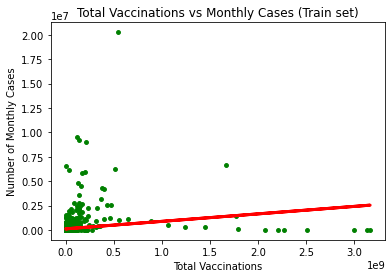

In [55]:
# Visualizing the training set results.
plot_train2 = plt
plot_train2.scatter(X_train2, y_train2, color='green', s = 15)
plot_train2.plot(X_train2, y_predicted_train2, color='red', linewidth =3)
plot_train2.title('Total Vaccinations vs Monthly Cases (Train set)')
plot_train2.xlabel('Total Vaccinations')
plot_train2.ylabel('Number of Monthly Cases')
plot_train2.show()

### Total Vaccinations vs People Fully Vaccinated

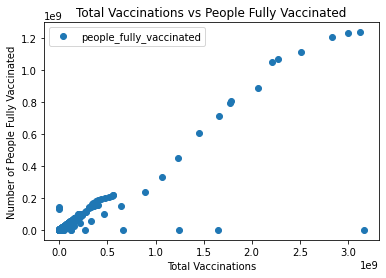

In [56]:
# Scatterplot3
df.plot(x = 'total_vaccinations', y='people_fully_vaccinated',style='o')
plt.title('Total Vaccinations vs People Fully Vaccinated')  
plt.xlabel('Total Vaccinations')  
plt.ylabel('Number of People Fully Vaccinated')  
plt.show()

## Hypothesis 3: The more vaccinations are administered, the more people will be fully vaccinated.

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X3 = df['total_vaccinations'].values.reshape(-1,1)
y3 = df['people_fully_vaccinated'].values.reshape(-1,1)

In [58]:
# Split data into a training set and a test set.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [59]:
# Fit the regression object onto the training set.
regression.fit(X_train3, y_train3)

LinearRegression()

In [60]:
# Predict the values of y using X.
y_predicted3 = regression.predict(X_test3)

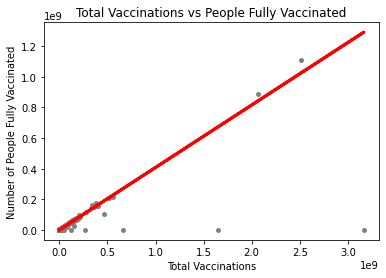

In [61]:
# Create a plot that shows the regression line from the model on the test set.
plot_test3 = plt
plot_test3.scatter(X_test3, y_test3, color='gray', s = 15)
plot_test3.plot(X_test3, y_predicted3, color='red', linewidth =3)
plot_test3.title('Total Vaccinations vs People Fully Vaccinated')
plot_test3.xlabel('Total Vaccinations')
plot_test3.ylabel('Number of People Fully Vaccinated')
plot_test3.show()

## Question 10
The line seem to fit quite well on the data set. The line moves in an upward direction that would suggest a positive correlation (as vaccinations increase so does the number of people fully vaccinated) and so does some of the actual data points (although not all of them).

In [62]:
# Create objects that contain the model summary statistics.
rmse3 = mean_squared_error(y_test3, y_predicted3)
r2_3 = r2_score(y_test3, y_predicted3)

In [63]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[0.40794635]]
Mean squared error:  1360020635627669.2
R2 score:  0.06083508612221766


In [64]:
y_predicted3

array([[ -57486.79647391],
       [3246562.91832884],
       [ 779093.27854719],
       ...,
       [ -57486.79647391],
       [ -57486.79647391],
       [ -42552.28840991]])

In [65]:
# Create a dataframe comparing the actual and predicted values of y.
data3 = pd.DataFrame({'Actual': y_test3.flatten(), 'Predicted': y_predicted3.flatten()})
data3.head(30)

,Actual,Predicted
0,0.0,-5.748680e+04
1,3117849.0,3.246563e+06
2,988156.0,7.790933e+05
3,50403.0,4.811099e+03
4,0.0,-5.748680e+04
5,0.0,-5.748680e+04
6,10124505.0,9.633487e+06
7,0.0,-5.650773e+04
8,805226.0,6.674685e+05
9,0.0,-5.748680e+04


## Question 13:
The linear regression model did not fit very well on the test set but fit very well on the training set. The R2 value of the test set is 0.0596... and on the training set 0.96 which is much better. The regression line also looked as though it fit quite well but when looking at the statistics and actual vs predicted dataframe, it was in actual fact not such a great fit. I believe this might also have something to do with the variability between countries, but also perhaps the fact that more vaccinations cannot necessarily mean more people will be fully vaccinated since many of the vaccines require 2 shots to be fully vaccinated and many countries have already started giving out "booster shots" which means people who were already counted among "fully vaccinated" will not be counted again once they get a booster shot, thus total vaccinations will increase, but not number of people fully vaccinated.

In [66]:
#Compare how the regression fits the training set
y_predicted_train3 = regression.predict(X_train3)

In [67]:
rmse3 = mean_squared_error(y_train3, y_predicted_train3)
r2_3 = r2_score(y_train3, y_predicted_train3)

In [68]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[0.40794635]]
Mean squared error:  108081820744033.84
R2 score:  0.9581108977243352


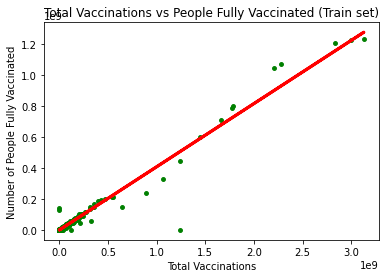

In [69]:
# Visualizing the training set results.
plot_train3 = plt
plot_train3.scatter(X_train3, y_train3, color='green', s = 15)
plot_train3.plot(X_train3, y_predicted_train3, color='red', linewidth =3)
plot_train3.title('Total Vaccinations vs People Fully Vaccinated (Train set)')
plot_train3.xlabel('Total Vaccinations')
plot_train3.ylabel('Number of People Fully Vaccinated')
plot_train3.show()